In [1]:
%matplotlib widget

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipyw

In [3]:
# load the results CSV file into a pandas data frame
# the encoding option here fixes an issue that probably arises due to symbols
election_results = pd.read_csv('general-election-2020.csv', encoding = "ISO-8859-1")

interactive(children=(Dropdown(description='Constituency:', options=('Carlow Kilkenny', 'Cavan Monaghan', 'Cla…

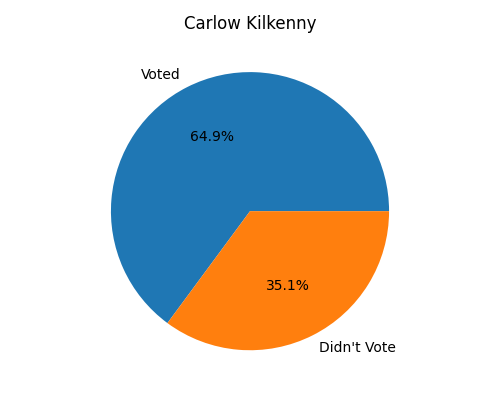

In [4]:
# Our template figure, this time using a variable (constit) to control the data shown

fig2 = plt.figure(figsize=(5,4))
ax = fig2.add_subplot(1, 1, 1)

constit = 'Carlow Kilkenny'
voted=(election_results[election_results['Constituency Name']==constit]['Total Poll'].values)[0]
didnt=(election_results[election_results['Constituency Name']==constit]['Total Electorate'].values - voted)[0]

pie = ax.pie( [voted, didnt], labels=["Voted", "Didn't Vote"], autopct='%1.1f%%')

ax.set_title(constit)

fig2.canvas.toolbar_visible=False
fig2.canvas.header_visible=False
fig2.canvas.footer_visible=False
fig2.canvas.resizable=False

plt.tight_layout()

# Create a function to update the data set and redraw the figure.
# In this case, we select the constituency and find its associated data!


# Note that pie charts don't easily allow their data to be chanegd, and so here I clear the axis and redraw it
# Line, scatter, and other plots have .set_data() or similar methods to allow you to do this!
# see the Interactivity notebook

def update(constit = 'Carlow Kilkenny'):
    ax.clear()
    voted=(election_results[election_results['Constituency Name']==constit]['Total Poll'].values)[0]
    didnt=(election_results[election_results['Constituency Name']==constit]['Total Electorate'].values - voted)[0]

    pie = ax.pie( [voted, didnt], labels=["Voted", "Didn't Vote"], autopct='%1.1f%%' )
    ax.set_title(constit)
#     fig2.canvas.draw()



    
# create a dropdown menu    
dropdown = ipyw.widgets.Dropdown(
    options= election_results['Constituency Name'],
    value='Carlow Kilkenny',
    description='Constituency:',
    disabled=False,
)

#enable the interaction
ipyw.interact(update, constit=dropdown);